In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
UF = input("Digite o UF: ")
Shape = input("Digite os 2 primeiros digitos do shapefile: ")

Digite o UF: DF
Digite os 2 primeiros digitos do shapefile: 53


# Importando o shapefile

In [3]:
gdf = gpd.read_file('Shapes/'+UF+'/'+Shape+'SEE250GC_SIR.shp')
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4454 entries, 0 to 4453
Data columns (total 14 columns):
ID            4454 non-null int64
CD_GEOCODI    4454 non-null object
TIPO          4454 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    4454 non-null object
NM_SUBDIST    4454 non-null object
CD_GEOCODD    4454 non-null object
NM_DISTRIT    4454 non-null object
CD_GEOCODM    4454 non-null object
NM_MUNICIP    4454 non-null object
NM_MICRO      4454 non-null object
NM_MESO       4454 non-null object
geometry      4454 non-null object
dtypes: int64(1), object(13)
memory usage: 487.2+ KB


In [4]:
gdf.sort_values('CD_GEOCODI',inplace = True)

# Importando os resultados do universo

In [5]:
dados = pd.read_csv('Planilhas/'+UF+'/CSV/Basico_'+UF+'.csv',sep =';')

In [6]:
dados.rename(columns={'Cod_setor':'CD_GEOCODI'}, inplace=True)
dados.shape

(4349, 13)

In [7]:
dados.head()

,CD_GEOCODI,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,530010805060001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"9506,63","138395782,55","11709,39","144747623,08"
1,530010805060002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7806,67","22289238,1","7806,67","22289238,1"
2,530010805060004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10939,03","192793982,08","12006,26","198863823,7"
3,530010805060005,22.0,49.0,"2,23","1,71","2502,36","6401543,86","2502,36","6401543,86","1453,43","3813161,9","1975,18","4160350,47"
4,530010805060006,186.0,676.0,"3,63","1,15","6932,78","6092027,74","6970,25","5862510,31","2972,86","12913470,61","5053,02","11433949,9"


# Fazendo um merge entre o geodataframe e o dataframe de dados do universo

In [8]:
gdf['CD_GEOCODI']= pd.to_numeric(gdf['CD_GEOCODI'])

In [9]:
df = pd.merge(gdf,dados, on='CD_GEOCODI')

In [10]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4349 entries, 0 to 4348
Data columns (total 26 columns):
ID            4349 non-null int64
CD_GEOCODI    4349 non-null int64
TIPO          4349 non-null object
CD_GEOCODB    0 non-null object
NM_BAIRRO     0 non-null object
CD_GEOCODS    4349 non-null object
NM_SUBDIST    4349 non-null object
CD_GEOCODD    4349 non-null object
NM_DISTRIT    4349 non-null object
CD_GEOCODM    4349 non-null object
NM_MUNICIP    4349 non-null object
NM_MICRO      4349 non-null object
NM_MESO       4349 non-null object
geometry      4349 non-null object
V001          4336 non-null float64
V002          4336 non-null float64
V003          4336 non-null object
V004          4336 non-null object
V005          4336 non-null object
V006          4336 non-null object
V007          4334 non-null object
V008          4334 non-null object
V009          4349 non-null object
V010          4349 non-null object
V011          4348 non-null object
V012          43

In [11]:
del gdf
del dados

Text(0.5,1,'DF')

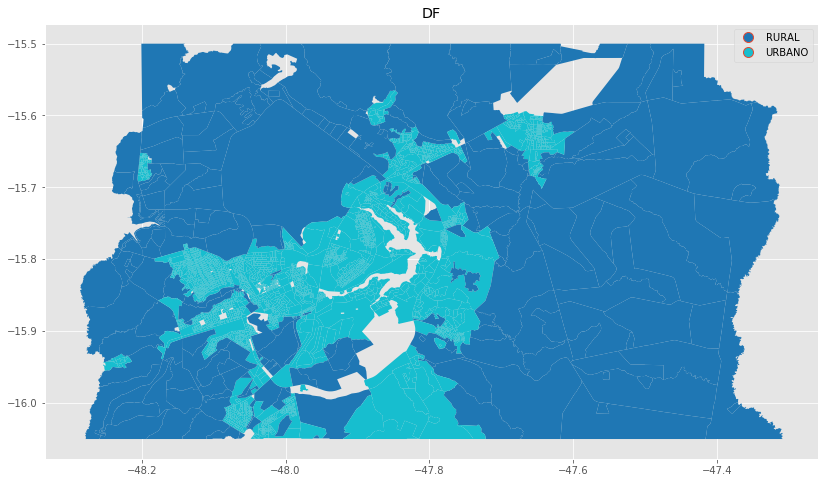

In [12]:
plt.style.use('ggplot')
df.plot(column = 'TIPO',figsize = (17,8),legend = True)
plt.title(UF)

# Utilizando a projeção de Albers para calcular as áreas

In [13]:
df['AREA'] = df.to_crs({'proj': 'aea'}).geometry.area/10**6

# Importando as regiões urbanas definidas pelo estudo da EMBRAPA em 2015

In [14]:
areas_urbanas_br_15 = gpd.read_file('Embrapa/areas_urbanas_br_15.shp')

In [15]:
areas_urbanas_br_15['Area'] = areas_urbanas_br_15.to_crs({'proj': 'aea'}).geometry.area/10**6

In [16]:
areas_urbanas_df_15 = areas_urbanas_br_15[areas_urbanas_br_15['UF']==UF]
del areas_urbanas_br_15

In [17]:
areas_urbanas_df_15.head()

,Municipio,UF,Area_Urb,Geocodigo,geometry,Area
4771,BrasÃ­lia,DF,888.816,5300108.0,(POLYGON ((-47.91946554195842 -16.048762950479...,888.809963


In [18]:
areas_urbanas_df_15.rename(columns={'Geocodigo':'CD_GEOCODM'}, inplace=True)
areas_urbanas_df_15['CD_GEOCODM']=areas_urbanas_df_15['CD_GEOCODM'].apply(lambda x: int(x))
areas_urbanas_df_15.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1 entries, 4771 to 4771
Data columns (total 6 columns):
Municipio     1 non-null object
UF            1 non-null object
Area_Urb      1 non-null float64
CD_GEOCODM    1 non-null int64
geometry      1 non-null object
Area          1 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 56.0+ bytes


In [19]:
df.fillna('0',inplace = True)

# Visualizando as distribuições de Moradias, Moradores e área 

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Nº de Moradias no DF')

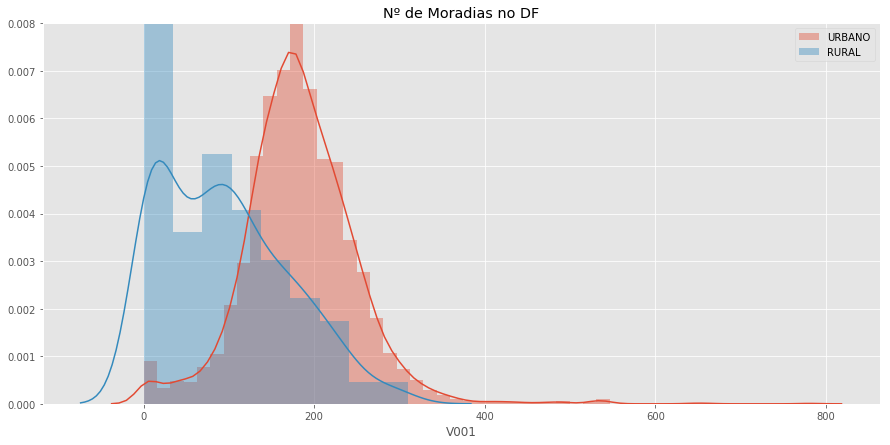

In [20]:
plt.style.use('ggplot')
df['V001'] = pd.to_numeric(df['V001'])
df['V002'] = pd.to_numeric(df['V002'])
fig = plt.figure(figsize = (15,7))
sns.distplot(df[df['TIPO'] =='URBANO']['V001'])
sns.distplot(df[df['TIPO']=='RURAL']['V001'])
plt.legend(['URBANO','RURAL'])
plt.ylim((0,0.008))
plt.title('Nº de Moradias no '+UF)

## Descrição do Número de Moradias por setor censitários urbanos e rurais

In [21]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V001'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V001'].describe())

RURAL 
 count    249.000000
mean      94.373494
std       74.369887
min        0.000000
25%       25.000000
50%       87.000000
75%      145.000000
max      310.000000
Name: V001, dtype: float64
URBANO 
 count    4100.000000
mean      183.054146
std        65.984107
min         0.000000
25%       145.000000
50%       179.000000
75%       220.000000
max       781.000000
Name: V001, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.05)

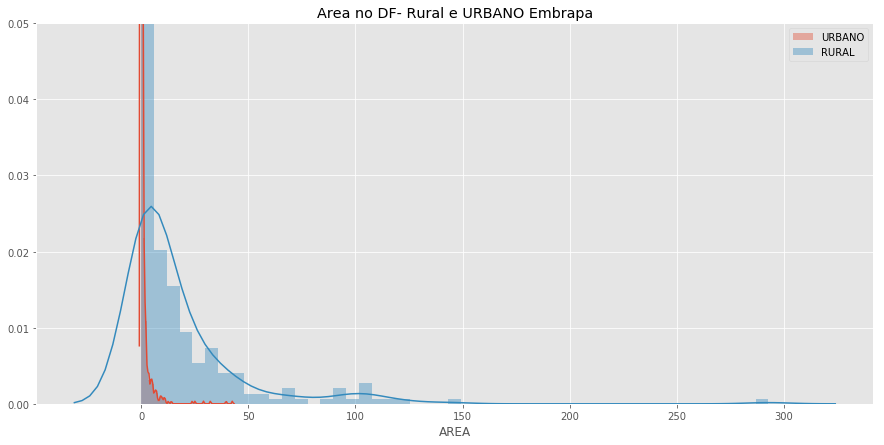

In [34]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['AREA'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['AREA'])
plt.legend(['URBANO','RURAL'])
plt.title('Area no ' +UF+'- Rural e URBANO Embrapa')
plt.ylim((0,0.05))

In [35]:
df['Densidade Moradias'] = df.V001/df.AREA

/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Densidade de moradias')

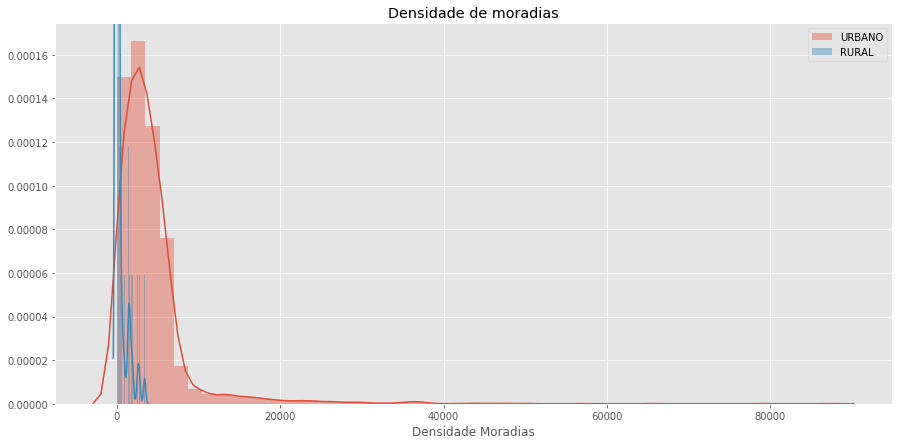

In [36]:
plt.style.use('ggplot')
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['Densidade Moradias'])
sns.distplot(df[df['TIPO']=='RURAL']['Densidade Moradias'])
plt.legend(['URBANO','RURAL'])
plt.title('Densidade de moradias')
#plt.ylim((0,0.05))

In [37]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['Densidade Moradias'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['Densidade Moradias'].describe())

RURAL 
 count     249.000000
mean      125.248335
std       420.256464
min         0.000000
25%         3.023128
50%        11.534002
75%        37.357127
max      3410.669505
Name: Densidade Moradias, dtype: float64
URBANO 
 count     4100.000000
mean      4109.989172
std       5055.638684
min          0.000000
25%       1650.417665
50%       3164.086433
75%       5035.350102
max      87373.602666
Name: Densidade Moradias, dtype: float64


In [38]:
df[(df['TIPO']=='RURAL')&(df['Densidade Moradias']>df['Densidade Moradias'].quantile(q=0.5))].describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,1.0,1.000000e+00,1.0,1.0,1.000000,1.000000
mean,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505
std,NaN,NaN,NaN,NaN,NaN,NaN
min,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505
25%,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505
50%,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505
75%,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505
max,3054.0,5.300108e+14,141.0,546.0,0.041341,3410.669505


## Descrição da área por setor censitários urbanos e rurais

In [39]:
print('URBANO','\n',areas_urbanas_df_15['Area'].describe())
print('RURAL','\n',df[df['TIPO']=='RURAL']['AREA'].describe())

URBANO 
 count      1.000000
mean     888.809963
std             NaN
min      888.809963
25%      888.809963
50%      888.809963
75%      888.809963
max      888.809963
Name: Area, dtype: float64
RURAL 
 count    249.000000
mean      17.685783
std       31.409638
min        0.022232
25%        1.127558
50%        5.608061
75%       20.117345
max      292.754400
Name: AREA, dtype: float64


/home/alan/.local/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/alan/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(0, 0.003)

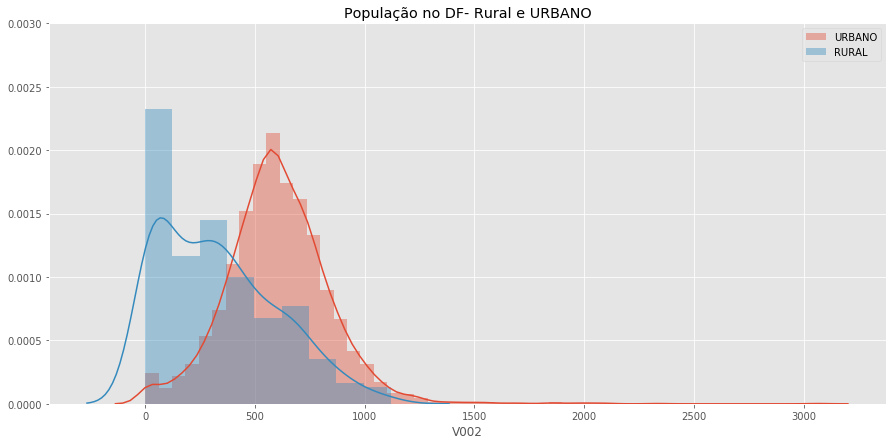

In [40]:
fig = plt.figure(figsize = (15,7))

sns.distplot(df[df['TIPO']=='URBANO']['V002'])
plt.legend(['URBANO'])
sns.distplot(df[df['TIPO']=='RURAL']['V002'])
plt.legend(['URBANO','RURAL'])
plt.title('População no '+UF+'- Rural e URBANO')
plt.ylim((0,0.003))

## Descrição do Número de moradores por setor censitários urbanos e rurais

In [41]:
print('RURAL','\n',df[df['TIPO']=='RURAL']['V002'].describe())
print('URBANO','\n',df[df['TIPO']=='URBANO']['V002'].describe())

RURAL 
 count     249.000000
mean      333.269076
std       266.391712
min         0.000000
25%        84.000000
50%       303.000000
75%       516.000000
max      1120.000000
Name: V002, dtype: float64
URBANO 
 count    4100.000000
mean      603.299268
std       237.633381
min         0.000000
25%       462.000000
50%       593.500000
75%       738.000000
max      3067.000000
Name: V002, dtype: float64


# Definindo os limites para filtrar os setores censitários 

In [42]:
max_area = areas_urbanas_df_15['Area'].mean() 
min_pop =  df[df['TIPO']=='URBANO']['V002'].mean()
min_mor =  df[df['TIPO']=='URBANO']['V001'].mean()
min_densidade_moradias = df[df['TIPO']=='URBANO']['Densidade Moradias'].quantile(q = 0.5)

In [43]:
scrcu = df[(df.TIPO=='RURAL')&(df.V001 >= min_mor)&(df.AREA <= max_area)&(df.V002>= min_pop)\
           &(df['Densidade Moradias']>= min_densidade_moradias)]

In [44]:
scrcu.describe()

,ID,CD_GEOCODI,V001,V002,AREA,Densidade Moradias
count,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
if scrcu['ID'].count()>0:
    plt.style.use('ggplot')
    scrcu.NM_MUNICIP.value_counts().plot.bar(figsize = (13,9))
    plt.title('SCRCU - Por Município')

# Visualizando as areas urbanas no estado - Sobrepondo scrcu e as regioes urbanas definidas pelo estudo da embrapa

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:393: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "'color'.", UserWarning)
/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)


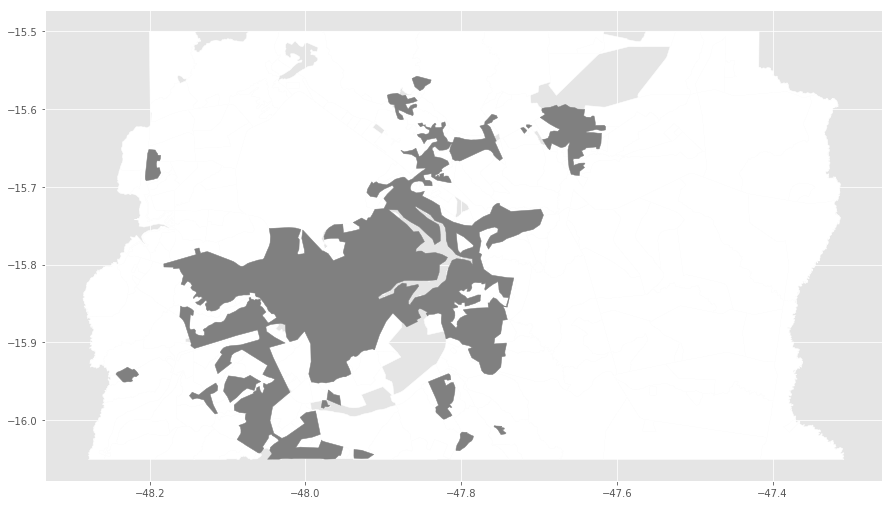

In [46]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize = (15,9))
ax.set_aspect('equal')
df.plot(ax=ax, color='white', edgecolor='white')
areas_urbanas_df_15.plot(ax=ax, color='gray', edgecolor='gray')
scrcu.plot(ax=ax,column = 'CD_GEOCODI',color = 'red',edgecolor='red')

In [47]:
areas_urbanas_df_15.rename(columns={'Area':'AREA'},inplace = True)

In [48]:
fonte = np.zeros(areas_urbanas_df_15.shape[0])
areas_urbanas_df_15['FONTE'] = fonte

In [49]:
fonte_1 = np.zeros(scrcu.shape[0])+1
scrcu['FONTE'] = fonte_1

In [50]:
regioes_urbanas_df = scrcu[['geometry','FONTE']].append(areas_urbanas_df_15[['geometry','FONTE']])

In [51]:
regioes_urbanas_df.head()

,geometry,FONTE
4771,(POLYGON ((-47.91946554195842 -16.048762950479...,0.0


In [52]:
def fonte(x):
    if x == 0:
        return 'EMBRAPA'
    return 'ALAN'
regioes_urbanas_df['FONTE'] = regioes_urbanas_df['FONTE'].apply(fonte) 

In [53]:
regioes_urbanas_df.to_file(driver = 'ESRI Shapefile',filename ='regioes_urbanas_'+UF+'.shp')

In [54]:
import mplleaflet
f, ax = plt.subplots(1,figsize = (15,7))
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='ALAN'].plot(ax=ax,color = 'red',edgecolor='red')
regioes_urbanas_df[regioes_urbanas_df['FONTE']=='EMBRAPA'].plot(ax=ax,color = 'purple',edgecolor='purple')

mplleaflet.display(fig=f,crs=regioes_urbanas_df.crs)

/home/alan/.local/lib/python3.6/site-packages/geopandas/plotting.py:405: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  "empty. Nothing has been displayed.", UserWarning)
